<a href="https://colab.research.google.com/github/MMBAYAR/IPG23/blob/main/Hafta_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
#. Gerekli kütüphanelerin çağırılması
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#. Mizanpaj
plt.rcParams['font.size'] = 8
plt.rcParams['figure.figsize'] = [8,6.75]
plt.rcParams['figure.dpi'] = 100
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [2]:
#. yolu bilinen dosyayı bir DataFrame nesnesi olarak df değişkenine değer olarak ata
df = pd.read_csv('/content/Auto.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
#. Yeni bir veri sütunu ekledim, değerlerini sonradan gireceğim
df[ 'hp/mpg' ] = None
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,hp/mpg
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,None
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,None
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,None
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,None
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,None
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,None
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,None
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,None
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,None


In [13]:
df.horsepower.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193,   0, 100, 105, 175,
       153, 180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208,
       155, 112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91,
       122,  67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,
        53,  81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,
        66, 139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,
        74, 116,  82])

In [15]:
#. Sorunlar:
#.   1.  '?' değeri var
#.   2.  Tüm sayısal değerler str formatında

#.   1.  '?' yerine 0 yazalım
df.horsepower = df.horsepower.replace( '?', 0 )

#.   2.  Tüm sayısal değerler str formatında
df.horsepower = [int(i) for i in df.horsepower]

#.   '?' yerine 0 yazmıştık ama; 0 gerçekçi değil
#.   şimdi 0 yerine aynı markanın ortalamasını yazalım

#.   0 beygir gücü olan araç hangi marka?
df[df.horsepower == 0]
#.   0 beygir gücü olan Ford'lar
df[(df.horsepower == 0) & ('ford' in df.name)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,hp/mpg


In [16]:
#.   İçinde 'ford' geçenler için özel işlemimiz
[('ford' in i) for i in df.name]

[False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 Fa

In [25]:
#.   '?' yerine 0 yazmıştık ama; 0 gerçekçi değil
#.   şimdi 0 yerine aynı markanın ortalamasını yazalım

#.   0 beygir gücü olan araç hangi marka?
df[df.horsepower == 0]
#.   0 beygir gücü olan Ford'lar
df[(df.horsepower == 0) & ([('ford' in i) for i in df.name])]
#.   0 beygir gücü olmayan Ford'ların beygirgücü ortalaması
ort = df[(df.horsepower != 0) & ([('ford' in i) for i in df.name])].horsepower.mean()

#.   Yamama
df[(df.horsepower == 0) & ([('ford' in i) for i in df.name])].horsepower = ort

70.0

In [ ]:
#.   '?' yerine 0 yazmıştık ama; 0 gerçekçi değil
#.   şimdi 0 yerine aynı markanın ortalamasını yazalım

#.   0 beygir gücü olan araç hangi marka?
df[df.horsepower == 0]
#.   0 beygir gücü olan Renault'lar
df[(df.horsepower == 0) & ([('renault' in i) for i in df.name])]
#.   beygir gücü 0 olmayan Renaultlar'ın beygir güclerinin ortalaması
ort = df[(df.horsepower != 0) & ([('renault' in i) for i in df.name])].horsepower.mean()

#.   Yamama
df[(df.horsepower == 0) & ([('renault' in i) for i in df.name])].horsepower = ort

In [27]:
df[df.horsepower == 0]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,hp/mpg
32,25.0,4,98.0,0,2046,19.0,71,1,ford pinto,None
126,21.0,6,200.0,0,2875,17.0,74,1,ford maverick,None
330,40.9,4,85.0,0,1835,17.3,80,2,renault lecar deluxe,None
336,23.6,4,140.0,0,2905,14.3,80,1,ford mustang cobra,None
354,34.5,4,100.0,0,2320,15.8,81,2,renault 18i,None


In [28]:
#. Niye çalışmadığını anlamadım;
#.   2. yol tek tek bak bir döngü içerisinde ve yaz
for i in df.index:
  if (df.horsepower.iloc[i] == 0) and ('ford' in df.name.iloc[i]):
    df.horsepower.iloc[i] = df[(df.horsepower != 0) & ([('ford' in i) for i in df.name])].horsepower.mean()
  elif (df.horsepower.iloc[i] == 0) and ('renault' in df.name.iloc[i]):
    df.horsepower.iloc[i] = df[(df.horsepower != 0) & ([('reanult' in i) for i in df.name])].horsepower.mean()

df.horsepower.unique()

<ipython-input-28-f865200e95ed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.horsepower.iloc[i] = df[(df.horsepower != 0) & ([('ford' in i) for i in df.name])].horsepower.mean()
<ipython-input-28-f865200e95ed>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.horsepower.iloc[i] = df[(df.horsepower != 0) & ([('reanult' in i) for i in df.name])].horsepower.mean()


array([130.        , 165.        , 150.        , 140.        ,
       198.        , 220.        , 215.        , 225.        ,
       190.        , 170.        , 160.        ,  95.        ,
        97.        ,  85.        ,  88.        ,  46.        ,
        87.        ,  90.        , 113.        , 200.        ,
       210.        , 193.        , 112.22916667, 100.        ,
       105.        , 175.        , 153.        , 180.        ,
       110.        ,  72.        ,  86.        ,  70.        ,
        76.        ,  65.        ,  69.        ,  60.        ,
        80.        ,  54.        , 208.        , 155.        ,
       112.        ,  92.        , 145.        , 137.        ,
       158.        , 167.        ,  94.        , 107.        ,
       230.        ,  49.        ,  75.        ,  91.        ,
       122.        ,  67.        ,  83.        ,  78.        ,
        52.        ,  61.        ,  93.        , 148.        ,
       129.        ,  96.        ,  71.        ,  98.  

In [31]:
#. 3. yol

df[(df.horsepower == 0) & (['ford ' in i for i in df.name])].horsepower = df[(df.horsepower == 0) & (['ford ' in i for i in df.name])].horsepower.replace(
0,
df[(df.horsepower != 0) & ([('renault' in i) for i in df.name])].horsepower.mean()
)

Series([], Name: horsepower, dtype: float64)

In [32]:
df.hp/mpg = df.horsepower / df.mpg
#. Çalışmadı çünkü vektör arasında bölme işlemi yapılamaz

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (<ipython-input-32-fb27cc467a2f>, line 1)

In [34]:
df['hp/mpg'] = [ df.horsepower.iloc[i] / df.mpg.iloc[i] for i in df.index ]
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,hp/mpg
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,7.222222
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,11.000000
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,8.333333
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,9.375000
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,8.235294
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,3.185185
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,1.181818
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,2.625000
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,2.821429


#. Veri Görselleştime

##. tekil veri histogramla gösterilir
##. ikili veri karşılaştırması için scatterplot kullanılır
##. İlişki için bazen lineplot da kullanılır

In [35]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,hp/mpg
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,7.222222
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,11.000000
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,8.333333
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,9.375000
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,8.235294
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,3.185185
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,1.181818
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,2.625000
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,2.821429


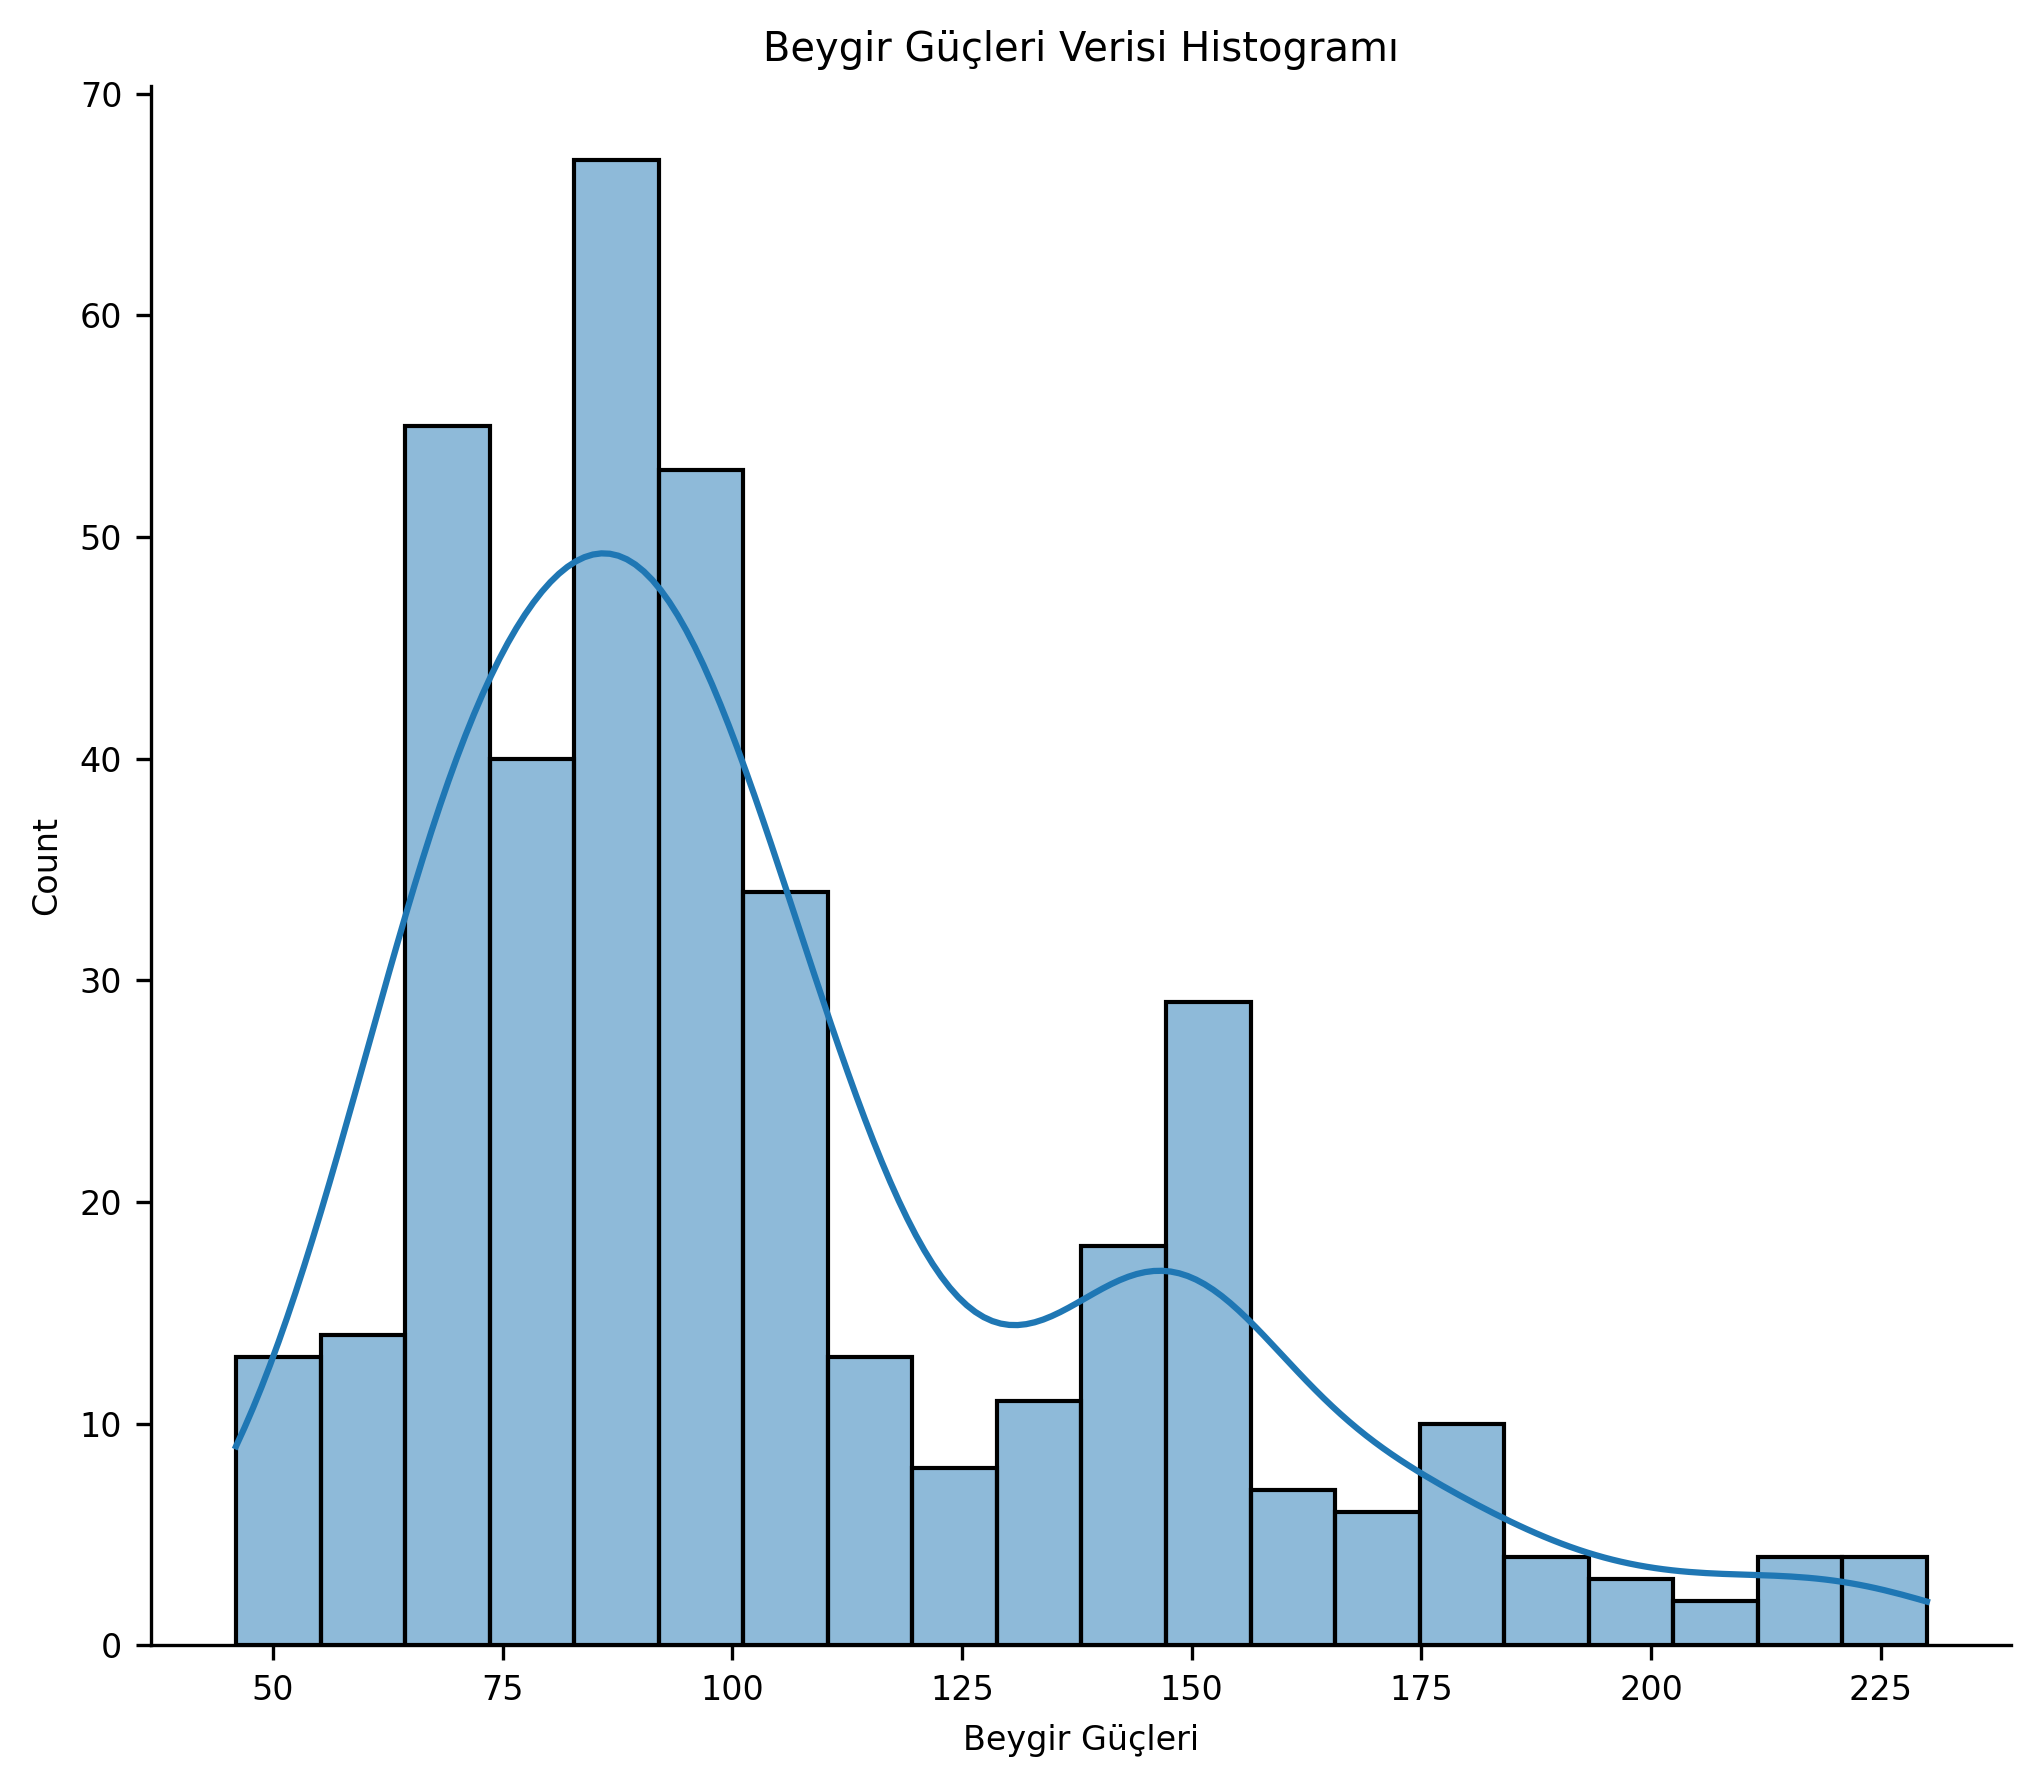

In [61]:
#. Beygir güçleri nasıl dağılmış?
sns.histplot(
df.horsepower,
bins = 20,
kde = True
)

#. Düşey eksinin etiketi Count olmasın Frekans olsun
plt.xlabel('Beygir Güçleri')
# plt.ylabel('Frekans')

#. Grafik için Başlık Oluşturuyorum: Beygir Güçleri Verisi Histogramı
plt.title('Beygir Güçleri Verisi Histogramı')

#. Bu görseli kaydet
plt.savefig('HP_hist.png')

Bu görsele bakarak iki ayrı odak etrafında öbeklenmiş arabalar olduğunu sezinliyorum.

<Axes: xlabel='mpg', ylabel='horsepower'>

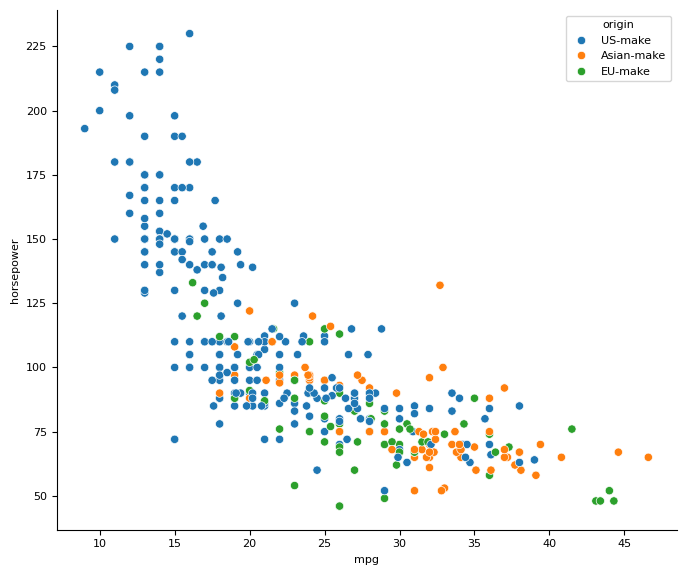

In [68]:
#. Beygir güçleri ile Yakıt tüketimlerini karşılaştırmak istedim
for i,j in [(1,'US-make'),(2,'EU-make'),(3,'Asian-make')]:
  df.origin = df.origin.replace(i,j)
sns.scatterplot(
x = df.mpg,
y = df.horsepower,
#color = 'yellow',
hue = df.origin,
)

Avrupa ve Asya ekolü birbirlerine benzerken; Amerikan araçları çok yakıt tüketim az yol katediyorlar.

Bu veri bulutu muza benziyor. Öyleyse aralarında ilişki 2. dereceden polinomla açıklanıyor olabilir.

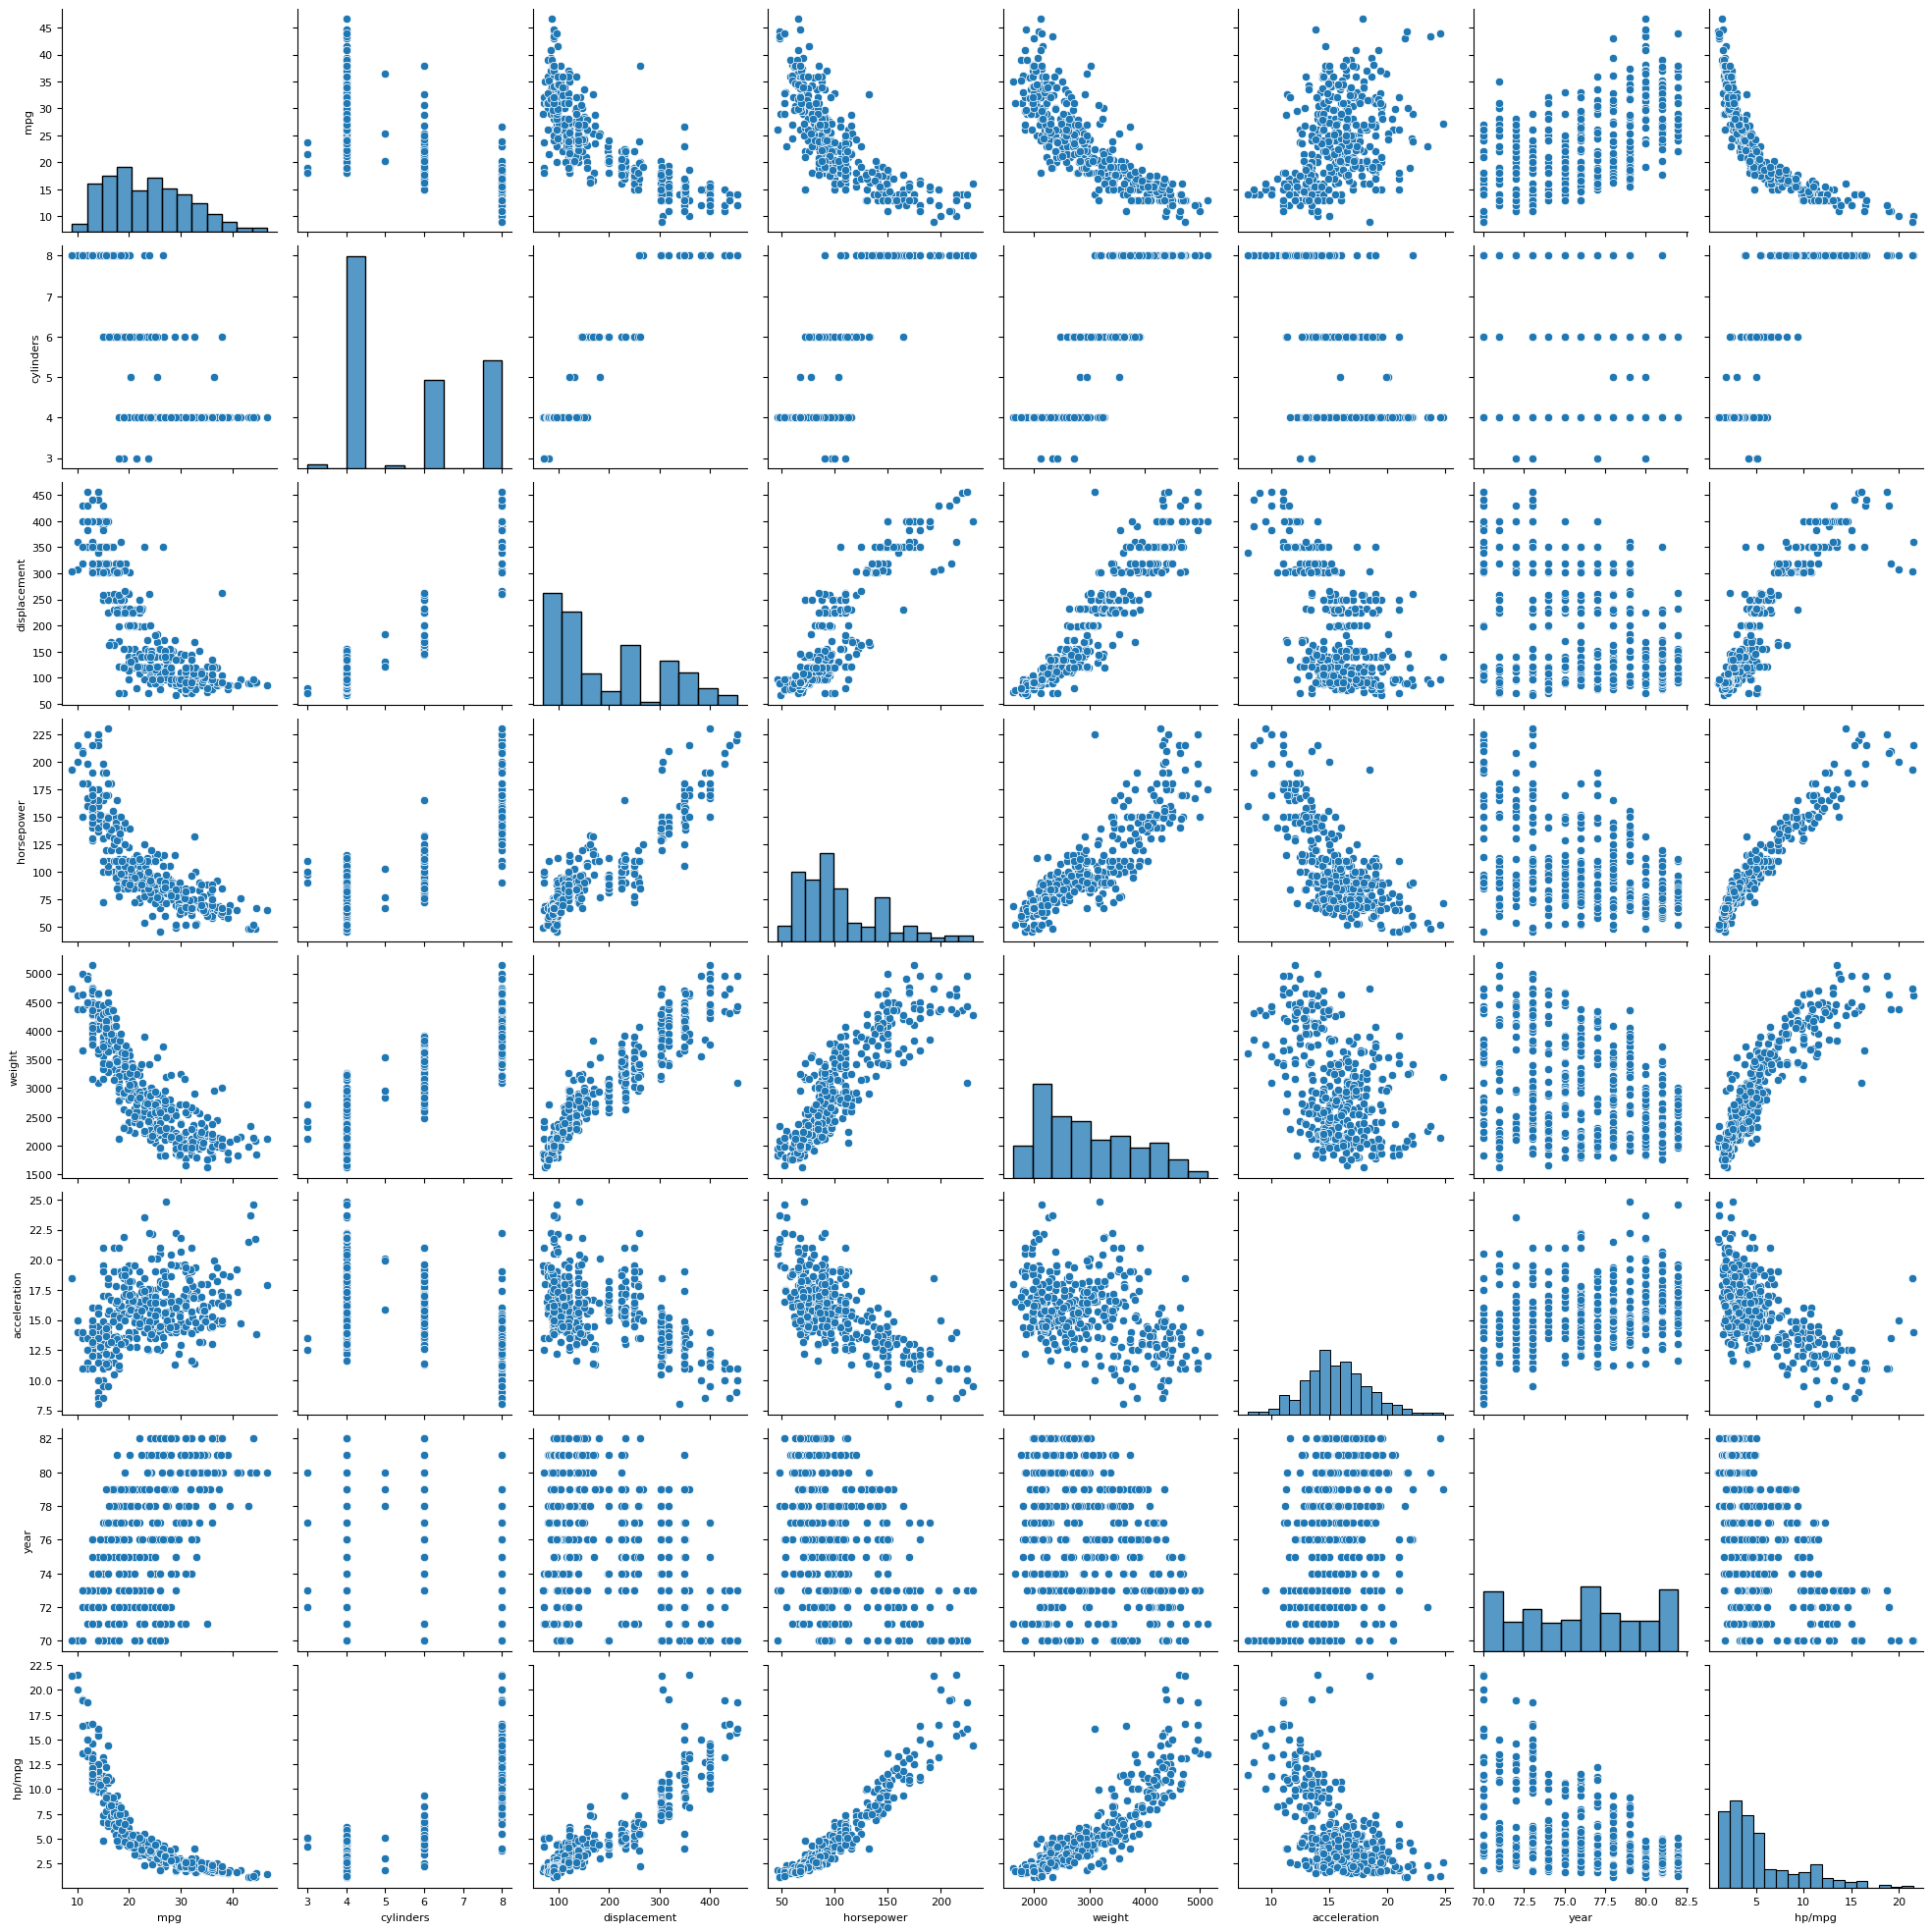

In [77]:
#. Tüm veri ikililerine tek seferde bakmak

sns.pairplot( df )

In [72]:
#. Fonksiyon yazıyorum
print('f(x) = sin( (x-2)^2 ) + 0.4x')

f(x) = sin( (x-2)^2 ) + 0.4x


<Axes: >

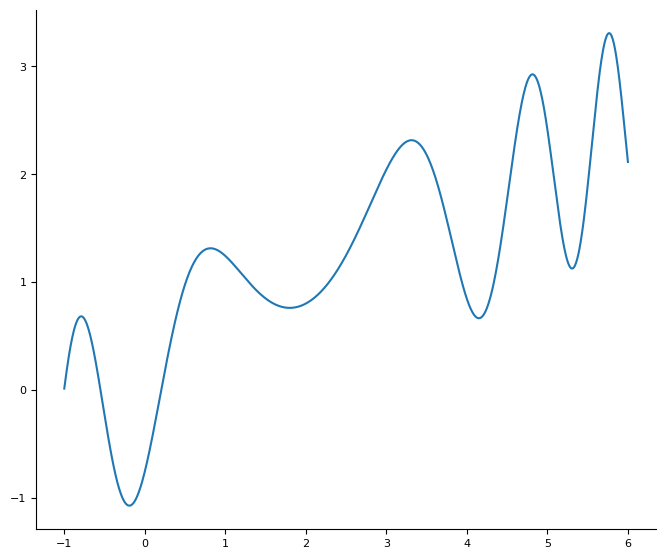

In [76]:
#. Hafif yukarı meyilli bir trigonometrik fonksiyon
def f(x):
  return np.sin( (x-2)**2 ) + 0.4*x

#. -1 ile 6 arasında eşit aralıklı 1000 ayrı değer üret
X = np.linspace( -1, 6, 10**3 )

sns.lineplot(
x = X,
y = f(X)
)